In [8]:
#Read in libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Set notebook preferences**

In [9]:
#Set plot style
plt.style.use('Solarize_Light2')

#Set path to draw_data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Bank Churn Analysis\Data\02_Cleaned_Data'

**Read in Data**

In [10]:
#Read in data
df = pd.read_csv(path + '/2020_0720_Cleaned_Churn_Date.csv', index_col=0)

**Data Preview**

In [11]:
#Display details about data
print('Raw data shape:',df.shape)
display(df.head())

Raw data shape: (10000, 12)


,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


**Data Overview**

In [12]:
#View data description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
creditscore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
gender,10000.0,0.545700,0.497932,0.00,0.00,1.000,1.0000,1.00
age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
numofproducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
hascrcard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
isactivemember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
estimatedsalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


## Exploratory Data Analysis

**Target Distribution**

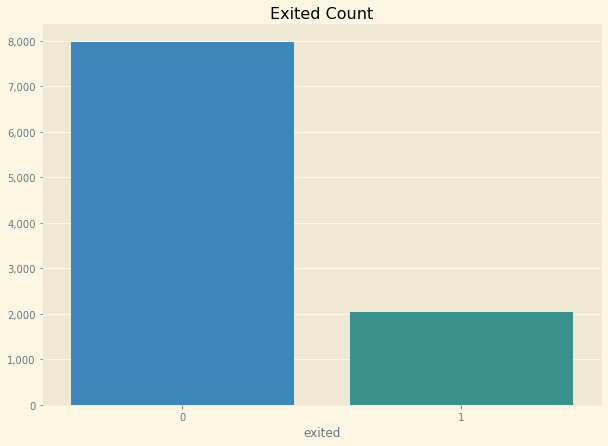

In [24]:
#Create plot
f, ax = plt.subplots(figsize = (10,7))

#Plot target counts
sns.countplot(x='exited', data = df, ax = ax,)

#PLot aesthetics
ax.set_title('Exited Count')
ax.set_ylabel('')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


**Correlation Matrix**

<AxesSubplot:>

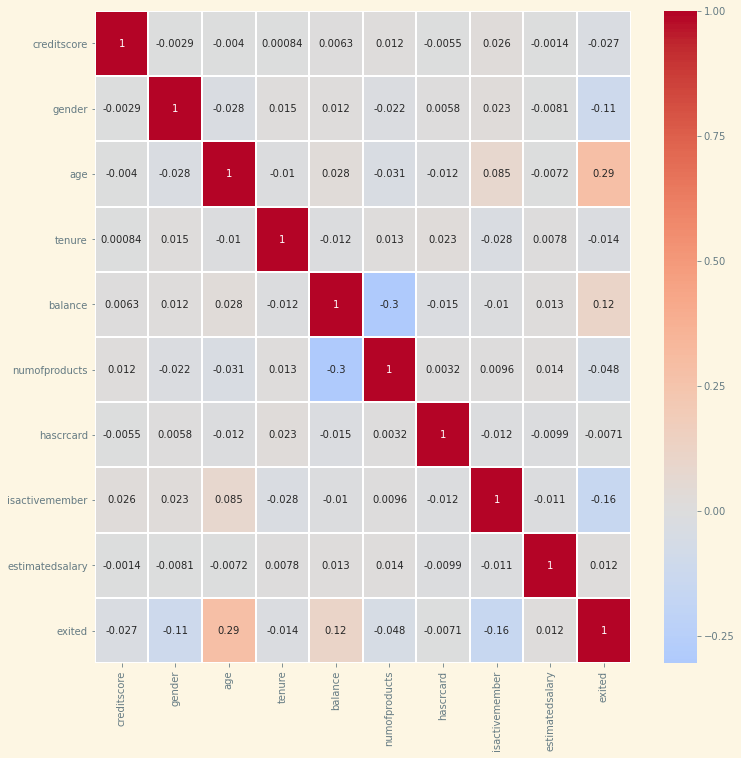

In [14]:
#Create figure
f, ax = plt.subplots(figsize = (12,12))

#Create and plot correlation matrix
corr = df.corr()
sns.heatmap(corr, ax=ax, linewidths= 1, linecolor='white',annot = True, cmap = 'coolwarm',center = 0)

**Countplot by country and gender**

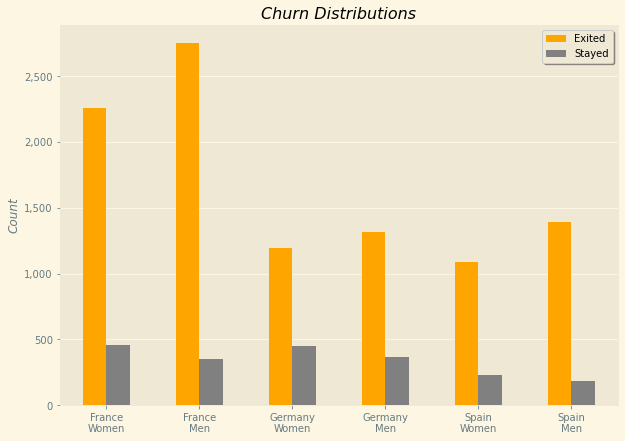

In [15]:
#Create figure
f, ax = plt.subplots(figsize = (10,7))

#Plot target
df.groupby(['geography','gender'])['exited'].agg({'count','sum'}).plot(kind = 'bar', ax = ax, color = ['orange', 'grey'])

cats = ['France\nWomen','France\nMen','Germany\nWomen','Germany\nMen','Spain\nWomen','Spain\nMen']
# ax.set_xticks(cats)
ax.set_xticklabels(cats)
plt.xticks(rotation=0)

###Set plot aesthetics**
ax.set_title('Churn Distributions', style = 'italic')
ax.set_xlabel('')
ax.set_ylabel('Count', style = 'italic')
ax.legend(['Exited', 'Stayed'], shadow = True, frameon = True)
ax.grid(axis = 'x',b=False)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


**Distributions**

Text(0.5, 0, 'Age')

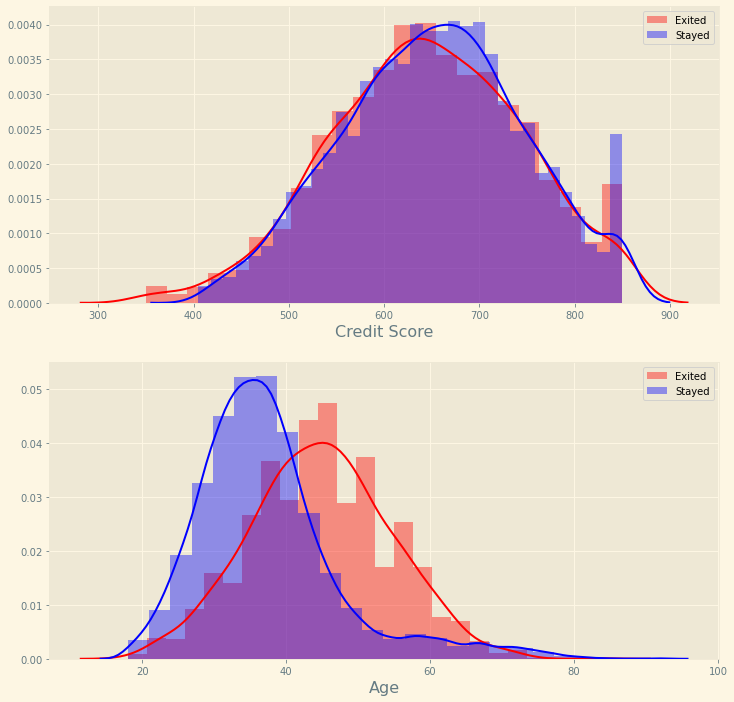

In [16]:
#Create figure
f, ax = plt.subplots(2,1,figsize = (12,12))


#Comapre credit scores of those that exited
sns.distplot(df.loc[df['exited'] == 1].creditscore, color = 'r',ax=ax[0])
sns.distplot(df.loc[df['exited'] == 0].creditscore, color = 'b',ax=ax[0])

#Set plot aesthetics
ax[0].legend(['Exited', 'Stayed'])
ax[0].set_xlabel('Credit Score', fontsize=16)

#Compare ages of those that exited
sns.distplot(df.loc[df['exited'] == 1].age, color = 'r',ax=ax[1], bins = 25)
sns.distplot(df.loc[df['exited'] == 0].age, color = 'b',ax=ax[1], bins = 25)

#Set plot aesthetics
ax[1].legend(['Exited', 'Stayed'])
ax[1].set_xlabel('Age', fontsize=16)